In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [15]:
df = pd.read_csv('BTC-USD.csv')


df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3564,2024-06-20,64960.296875,66438.960938,64547.847656,64828.656250,64828.656250,25641109124
3565,2024-06-21,64837.988281,65007.546875,63378.894531,64096.199219,64096.199219,26188171739
3566,2024-06-22,64113.863281,64475.468750,63929.757813,64252.578125,64252.578125,9858198793
3567,2024-06-23,64248.964844,64491.703125,63180.796875,63180.796875,63180.796875,11170471802


### FEATURES AND TARGET
- The features used were the high,low,open and volume
- The target variable was the closing price
-Hence we are predicting the closing price of bitcoin for a specific day

### CHECK FOR NULL VALUES

In [ ]:
#CHECKING FOR NULL VALUES
df.isnull().values.any()

### DROP IRRELEVANT COLUMNS:
- The adj close column is not used in bitcoin as it is the closing price that has been adjusted for corporate actions such as stock splits, dividends, and rights offerings. 
- Bitcoin does not do this hence the values for the adj close and the closing prices are virtually the same

In [22]:
#drop adj close column
df=df.drop(columns=['Adj Close'])


### SAMPLING THE DATA
- The data was sampled on a monthly and yearly basis as well to help better visualise some of the relations between the features

In [4]:
monthly_df=df[df.index%30==0]
monthly_df.reset_index(drop=True,inplace=True)
monthly_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2,2014-11-16,374.730011,390.799011,374.601990,387.881989,387.881989,11905600
3,2014-12-16,345.673004,345.859009,327.062012,327.062012,327.062012,30864900
4,2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504
...,...,...,...,...,...,...,...
114,2024-01-28,42126.125000,42797.175781,41696.910156,42035.593750,42035.593750,16858971687
115,2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,57085.371094,49756832031
116,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,34374900617
117,2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,63419.140625,19530783039


In [5]:
yearly_df=df.copy()
yearly_df=yearly_df[yearly_df.index%365==0]
yearly_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
365,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400
730,2016-09-16,607.245972,609.260986,606.734985,606.973022,606.973022,64963400
1095,2017-09-16,3637.750000,3808.840088,3487.790039,3625.040039,3625.040039,1818400000
1460,2018-09-16,6536.680176,6544.330078,6460.100098,6517.180176,6517.180176,3273730000
1825,2019-09-16,10347.222656,10386.867188,10189.744141,10276.793945,10276.793945,15160167779
2190,2020-09-15,10677.754883,10938.631836,10656.459961,10796.951172,10796.951172,32509451925
2555,2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,48176.347656,30484496466
2920,2022-09-15,20242.289063,20318.166016,19636.734375,19701.210938,19701.210938,36389011503
3285,2023-09-15,26533.818359,26840.498047,26240.701172,26608.693359,26608.693359,11479735788


### VARIATION OF TRANSACTION VOLUME OVER THE PAST 10 YEARS(ON A DAILY, MONTHLY AND YEARLY BASIS)
- This plot helps see just how much more people have migrated or at least adopted a cryptocurrency likek bitcoin over the past couple of years. 
- Though the number of people that have become accustomed to using the blockchain and bitcoin cannot be directly inferred the volume is one way to at least get an idea
- It also lets us know how much more the native bitcoin owners are doing transactions

Text(0, 0.5, 'Volume in Billions of dollars')

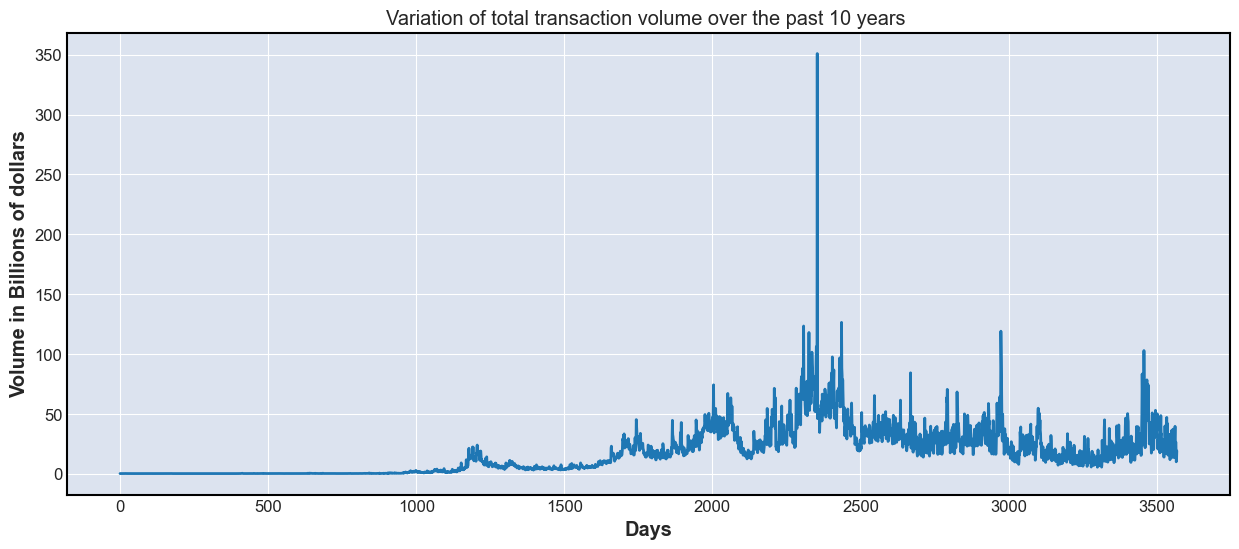

In [12]:
plt.title('Variation of total transaction volume over the past 10 years ')
plt.plot(df.index,df['Volume']/1000000000)
plt.xlabel('Days')
plt.ylabel('Volume in Billions of dollars')


Text(0, 0.5, 'Volume in Billions of dollars')

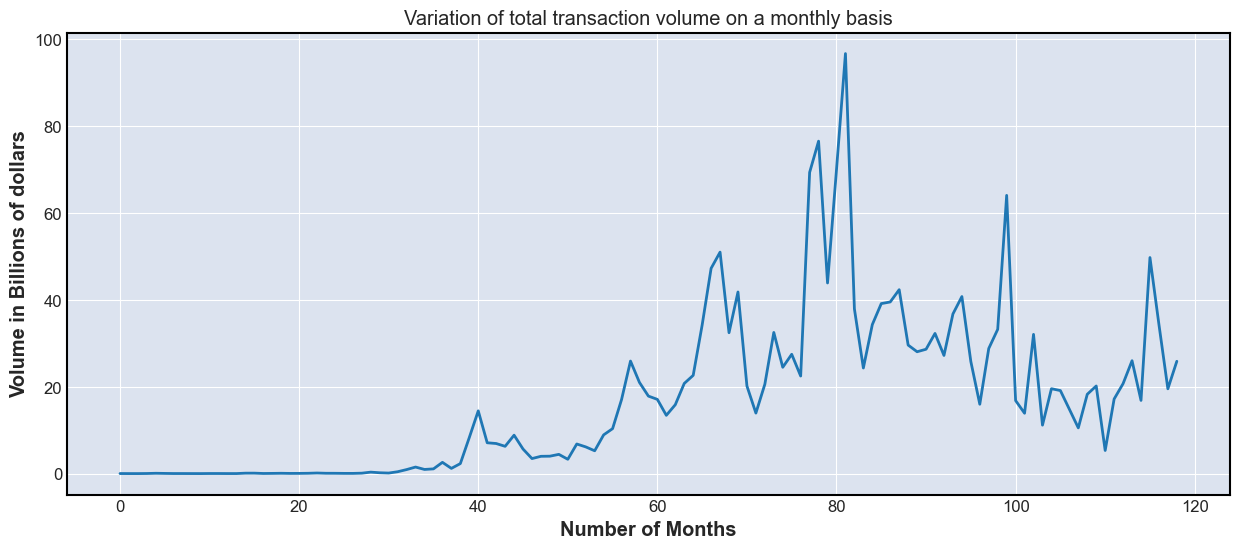

In [13]:
plt.title('Variation of total transaction volume on a monthly basis')
plt.plot(monthly_df.index,monthly_df['Volume']/1000000000)
plt.xlabel('Number of Months')
plt.ylabel('Volume in Billions of dollars')


Text(0, 0.5, 'Volume in Billions of dollars')

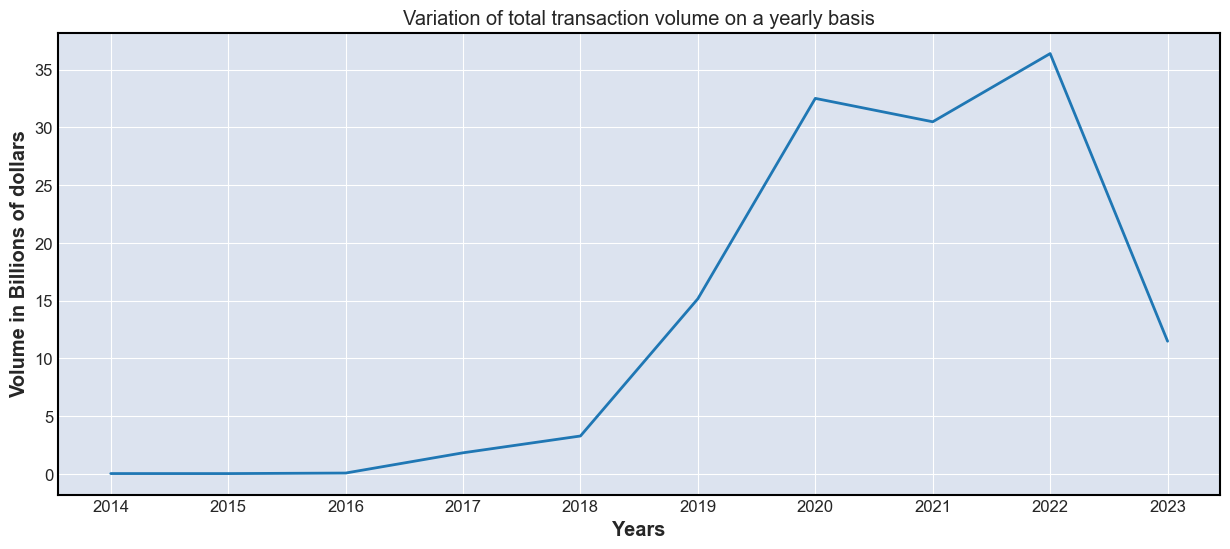

In [14]:
years=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
plt.title('Variation of total transaction volume on a yearly basis')
plt.plot(['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'],yearly_df['Volume']/1000000000)
plt.xlabel('Years')
plt.ylabel('Volume in Billions of dollars')


- From plots above we see that bitcoin transactions peaked day 2300-2500 which is in 2021 specifically
- This can be confirmed from the graph shown for the past 3569 days as well by running the cell below

In [16]:
df[df.Volume==df.Volume.max()]

,Date,Open,High,Low,Close,Adj Close,Volume
2354,2021-02-26,47180.464844,48370.785156,44454.84375,46339.761719,46339.761719,350967941479


## BITCOIN PROMINENCE OVER THE PAST 10 YEARS

Text(0, 0.5, 'Volume in Billions of dollars')

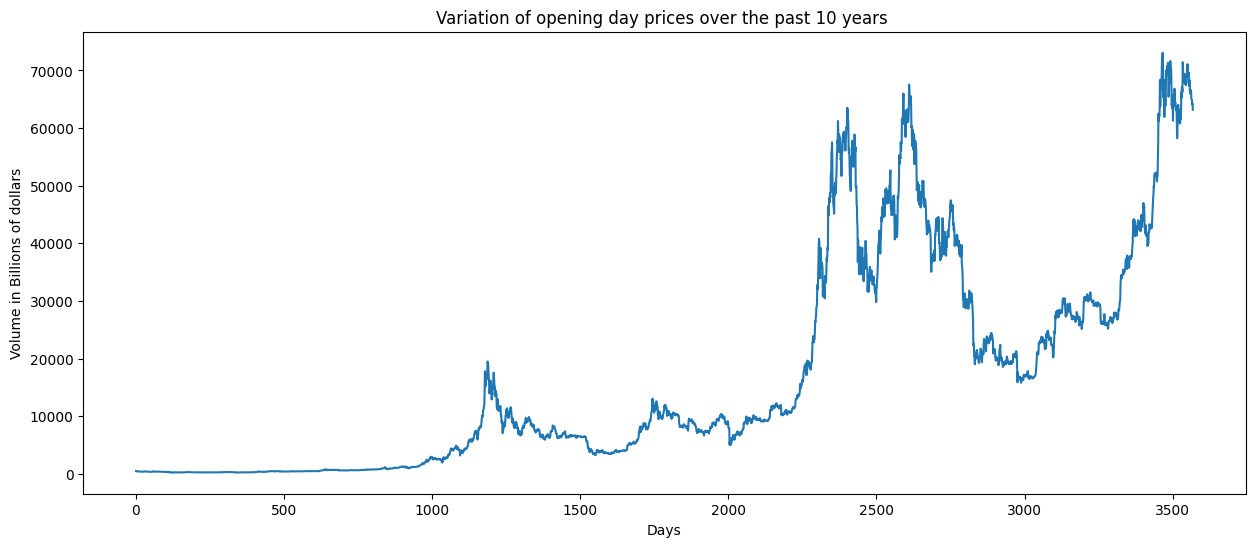

In [17]:
plt.title('Variation of opening day prices over the past 10 years ')
plt.plot(df.index,df['Open'])
plt.xlabel('Days')
plt.ylabel('Volume in Billions of dollars')


Text(0, 0.5, 'Volume in Billions of dollars')

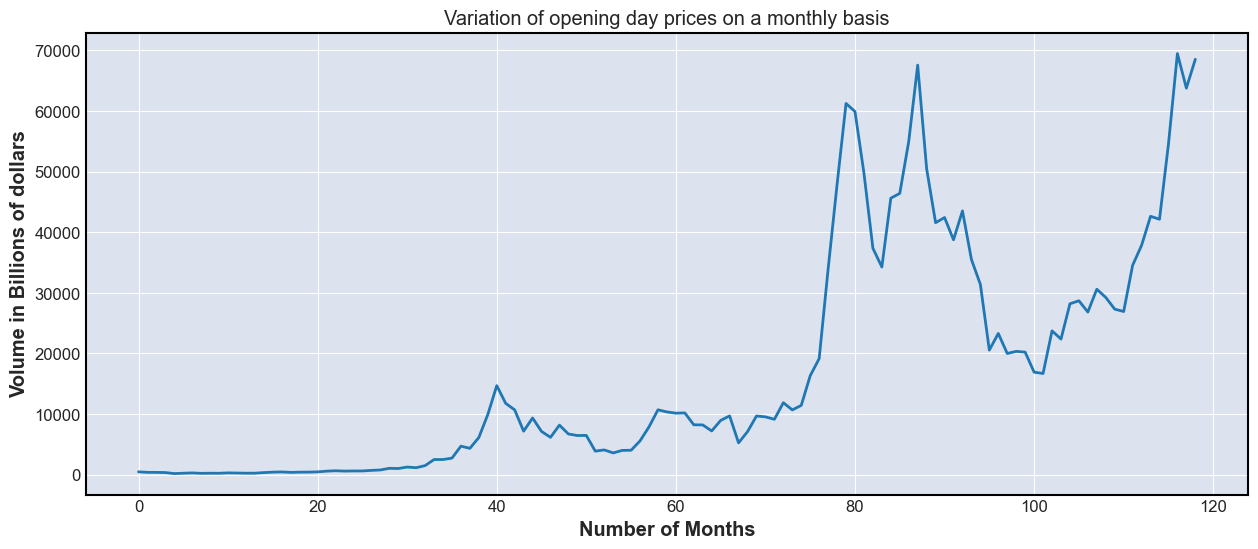

In [16]:
plt.title('Variation of opening day prices on a monthly basis')
plt.plot(monthly_df.index,monthly_df['Open'])
plt.xlabel('Number of Months')
plt.ylabel('Volume in Billions of dollars')


Text(0, 0.5, 'Volume in Billions of dollars')

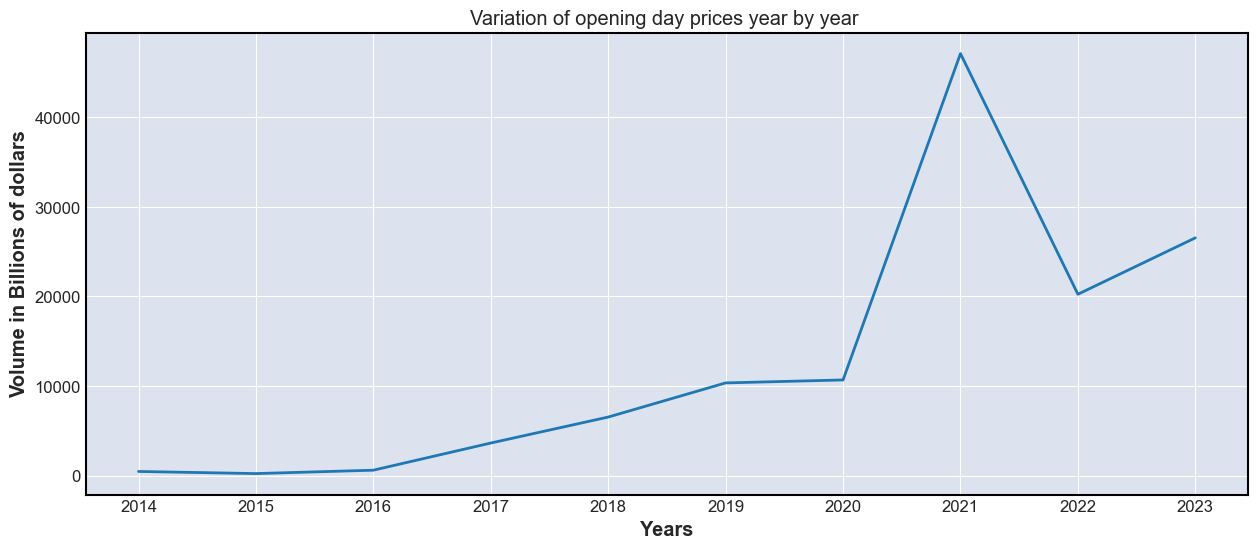

In [17]:
plt.title('Variation of opening day prices year by year ')
plt.plot(years,yearly_df['Open'])
plt.xlabel('Years')
plt.ylabel('Volume in Billions of dollars')


- Plots above show that bitcoin indeed did reach a peak in March of this year 2024
- The daily plot zooms in on this peak to be around day 3400
- This plot shows just how much bitcoin and the blockchain technology as a whole has grown since its inception
- Reaching a peak  of about 72000 dollars on 14th March 2024 bitcoin is now the most precious cryptocurrency in the world
- This can be confirmed by running the cell below as well 

In [19]:
df[df.Open==df.Open.max()]

,Date,Open,High,Low,Close,Adj Close,Volume
3466,2024-03-14,73079.375,73750.070313,68563.023438,71396.59375,71396.59375,59594605698


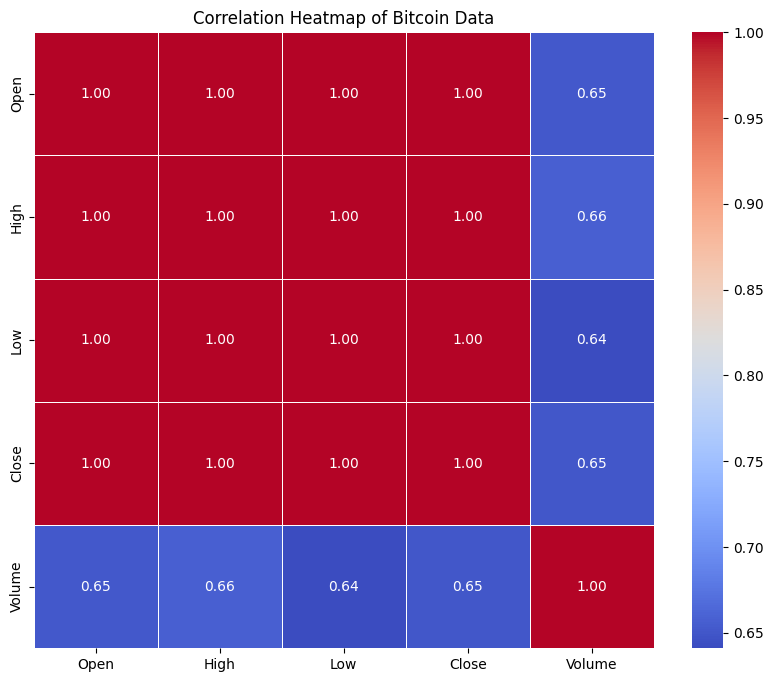

In [25]:
import seaborn as sns


# Calculate correlation matrix
corr_matrix = df[df.columns[1:]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Bitcoin Data')
plt.show()


- Plot above shows the strong relation between most of the features. As will be seen in plots below the variation of open and close and high and lowest prices are very close hence explaining the strong correlations
- the heatmap also shows a somewhat strong relation beteen the volume of transactions in a day and the peak,lowest,opening and closing prices for a day

### CANDLE STICK CHART

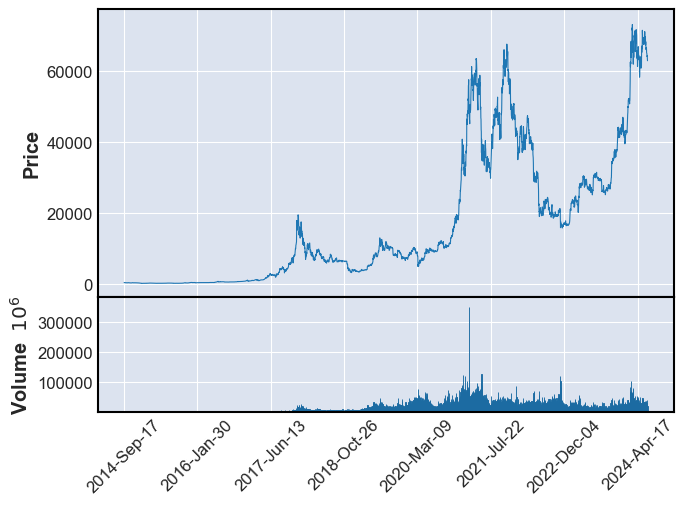

In [26]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf
file = 'BTC-USD copy.csv'
data = pd.read_csv(file)
#convert date column to date-time column
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date') #because the index automatically givemn by python can't be used to plot the candle stick
mpf.plot(data, type='line', volume=True)




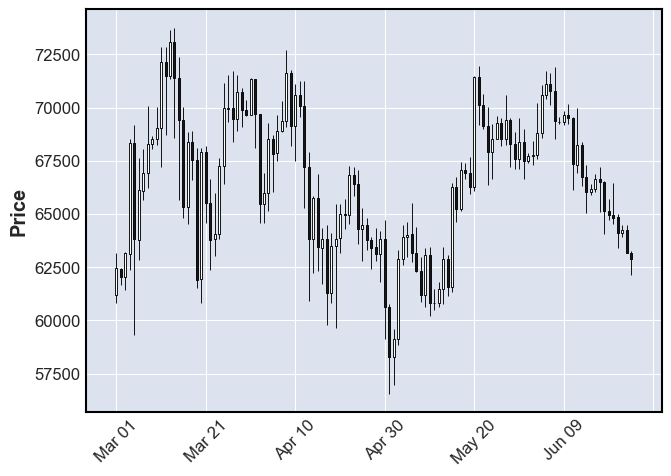

In [43]:
mpf.plot(data.loc['2024-03': '2024-06'], type='candle') #candlestick from march till june(june is the latest date) which clearly depicts opening price closing price and peak prices(both low and high)

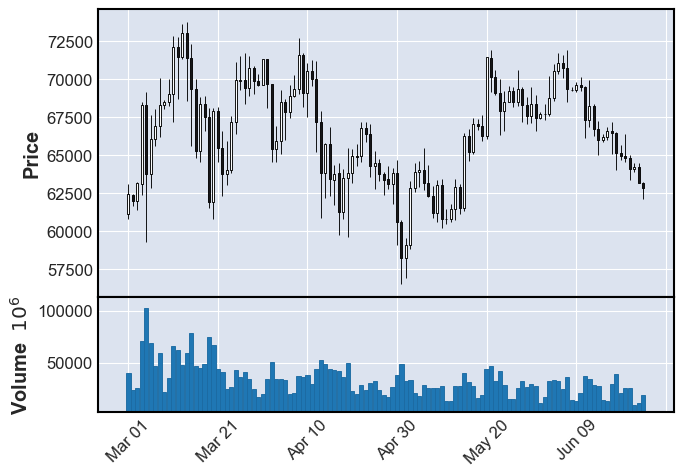

In [44]:
mpf.plot(data.loc['2024-03': '2024-06'], type='candle', volume=True)

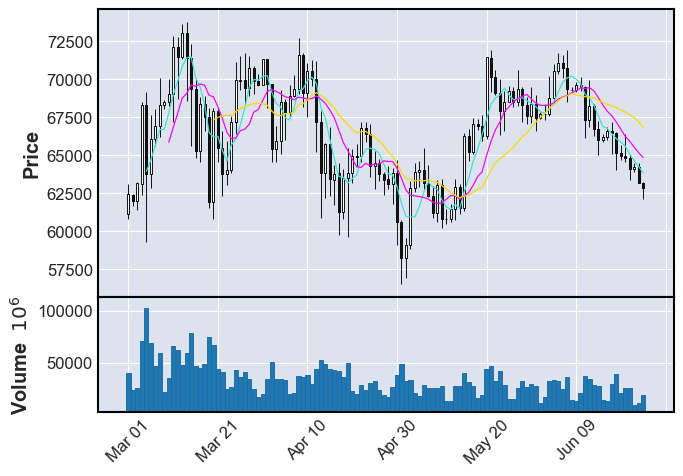

In [47]:
#candlestick with 20, 10 and 5 moving average used to determine best time to buy and below is a description of the volume of quantity traded at that particular date
mpf.plot(data.loc['2024-03':'2024-06'], type='candle', mav=(5, 10, 20), volume=True)

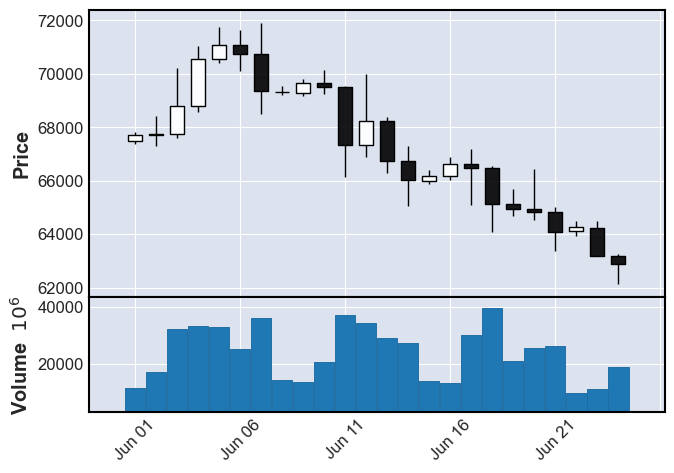

In [46]:
mpf.plot(data.loc['2024-06'], type='candle', volume=True) #as the month of june which was the target month wasn't clearly displayed above


## Moving Average

A moving average is a commonly used statistical technique in time series analysis. It calculates the average value of a series of data points over a specified period of time, updating as new data becomes available. The moving average smooths out short-term fluctuations or noise in the data, making it easier to identify trends or patterns.

For example, a 50-day moving average calculates the average value of the last 50 data points in a time series, updating with each new data point. Similarly, a 200-day moving average calculates the average value of the last 200 data points.

### How it helps:

- **Smoothing**: Moving averages help to smooth out short-term fluctuations or noise in the data, making it easier to identify underlying trends or patterns.
- **Trend Identification**: By smoothing out noise, moving averages make it easier to identify the direction of the trend in the data, whether it's upward, downward, or sideways.
- **Support and Resistance Levels**: Moving averages can act as dynamic support and resistance levels in the price chart. Traders often use moving averages to identify potential entry or exit points for trades.
- **Signal Generation**: Moving averages can generate buy or sell signals when different moving averages cross each other or when the price crosses above or below a moving average.
- **Confirmation**: Moving averages can be used to confirm the strength of a trend or the validity of a breakout. For example, a moving average crossover combined with increasing trading volume may provide stronger confirmation of a trend reversal or continuation.



### Price Above Moving Average:

**Definition**: This occurs when the current price of an asset moves above a moving average line.

**Significance**: It suggests that the asset is gaining strength and could continue to rise.

**Action**: Traders may take this as a signal to buy the asset.

### Price Below Moving Average:

**Definition**: This occurs when the current price of an asset moves below a moving average line.

**Significance**: It suggests that the asset is losing strength and could continue to fall.

**Action**: Traders may take this as a signal to sell the asset.


## FEATURE ENGINEERING
- We created more columns to calculate the moving average for 30,100,200 and 365 day intervals

In [26]:
new_df = df.copy()
new_df['30 Day MA'] = new_df['Close'].rolling(window=30).mean()

new_df['100 Day MA'] = new_df['Close'].rolling(window=100).mean()
new_df['200 Day MA'] = new_df['Close'].rolling(window=200).mean()
new_df['365 Day MA'] = new_df['Close'].rolling(window=365).mean()


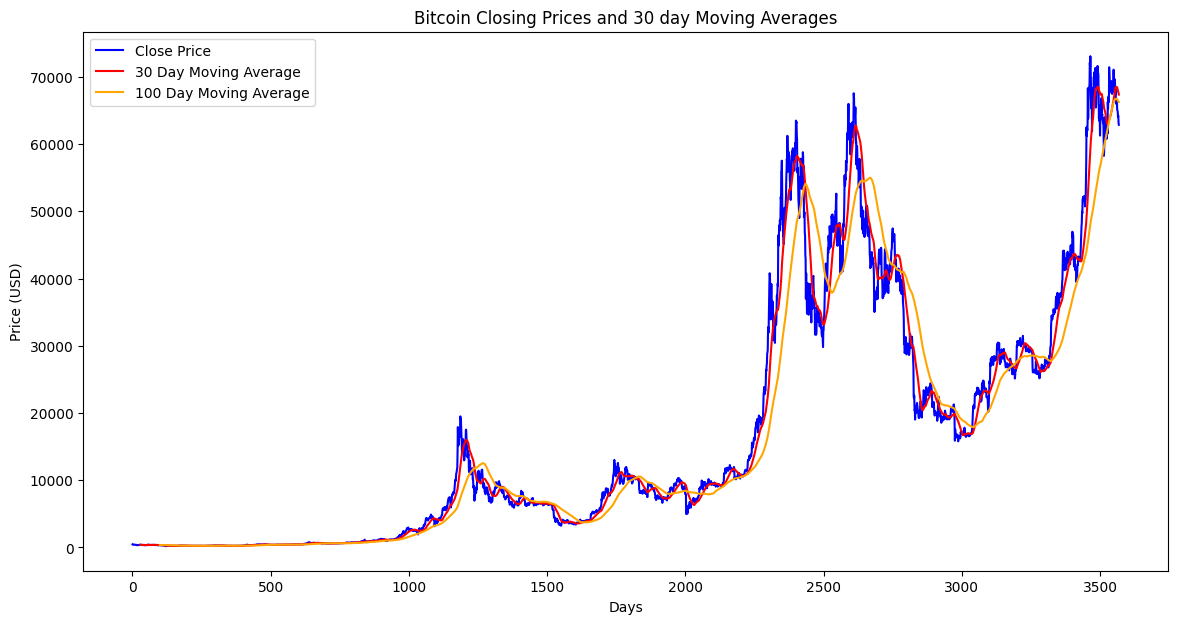

In [27]:

plt.figure(figsize=(14, 7))
plt.plot(new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df['30 Day MA'], label='30 Day Moving Average', color='red')
plt.plot(new_df['100 Day MA'], label='100 Day Moving Average', color='orange')

plt.title('Bitcoin Closing Prices and 30 day Moving Averages')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()



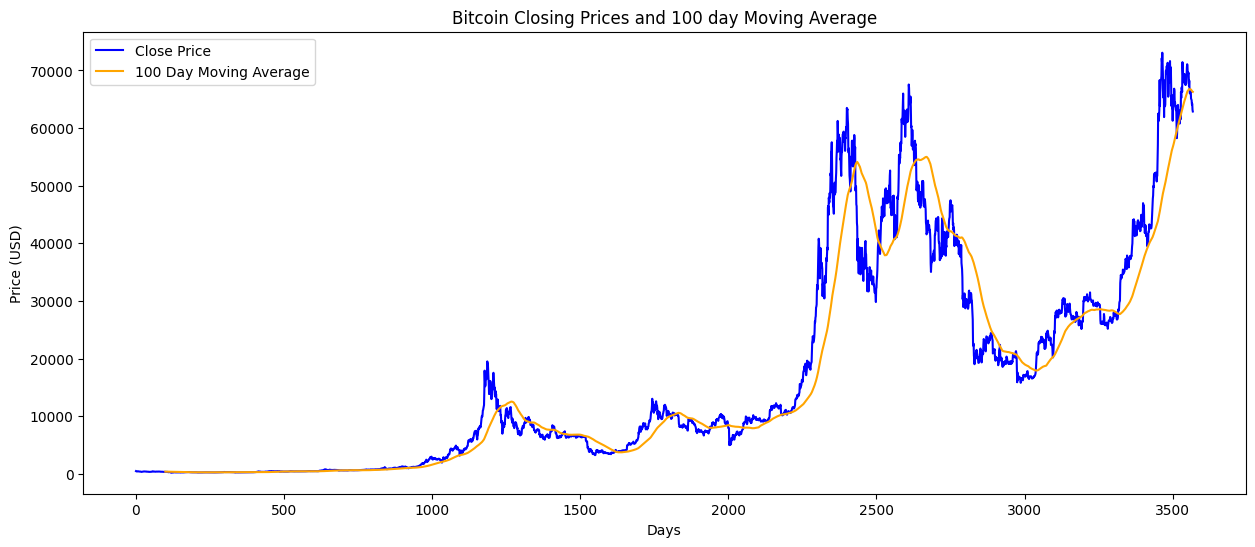

In [28]:
plt.plot(new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df['100 Day MA'], label='100 Day Moving Average', color='orange')
plt.title('Bitcoin Closing Prices and 100 day Moving Average')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()

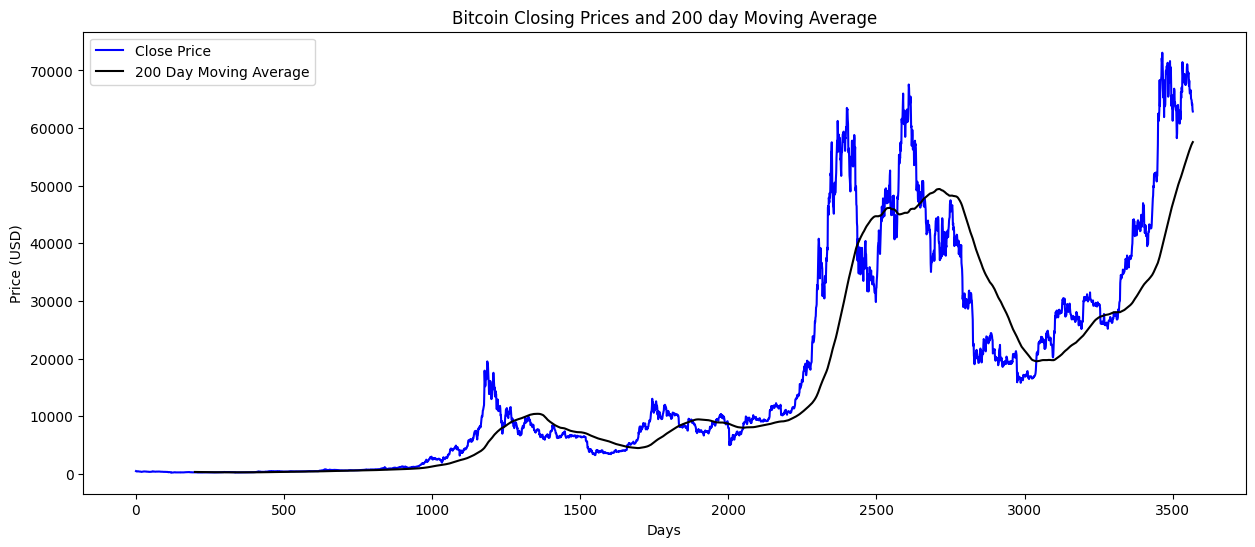

In [ ]:
plt.plot(new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df['200 Day MA'], label='200 Day Moving Average', color='black')
plt.title('Bitcoin Closing Prices and 200 day Moving Average')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()

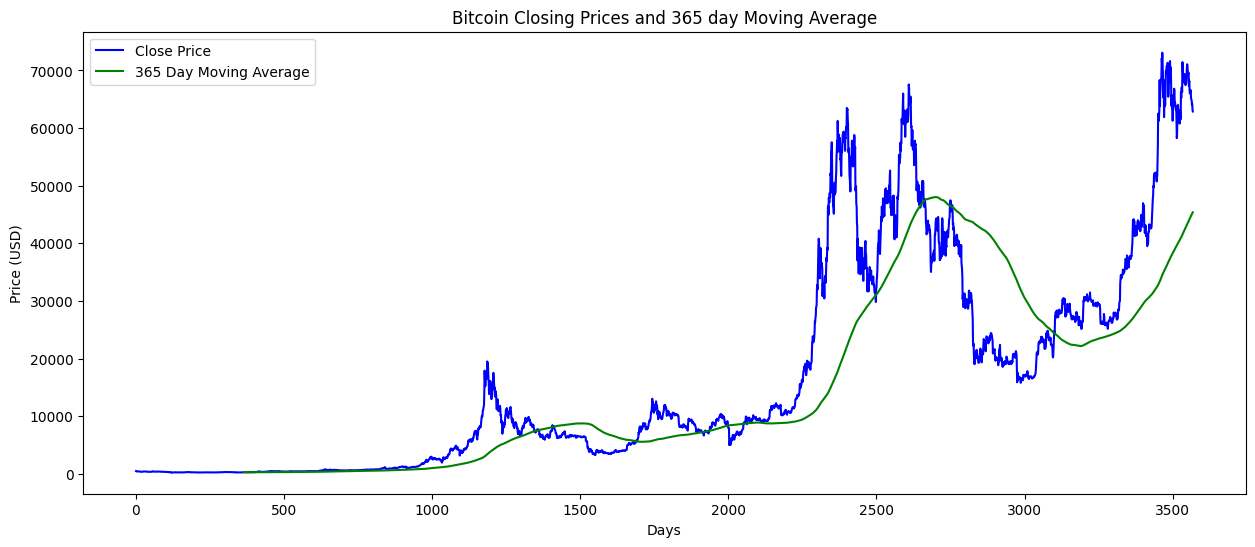

In [29]:
plt.plot(new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df['365 Day MA'], label='365 Day Moving Average', color='green')
plt.title('Bitcoin Closing Prices and 365 day Moving Average')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()

## VARIATION BETWEEN OPENING AND COSING PRICES



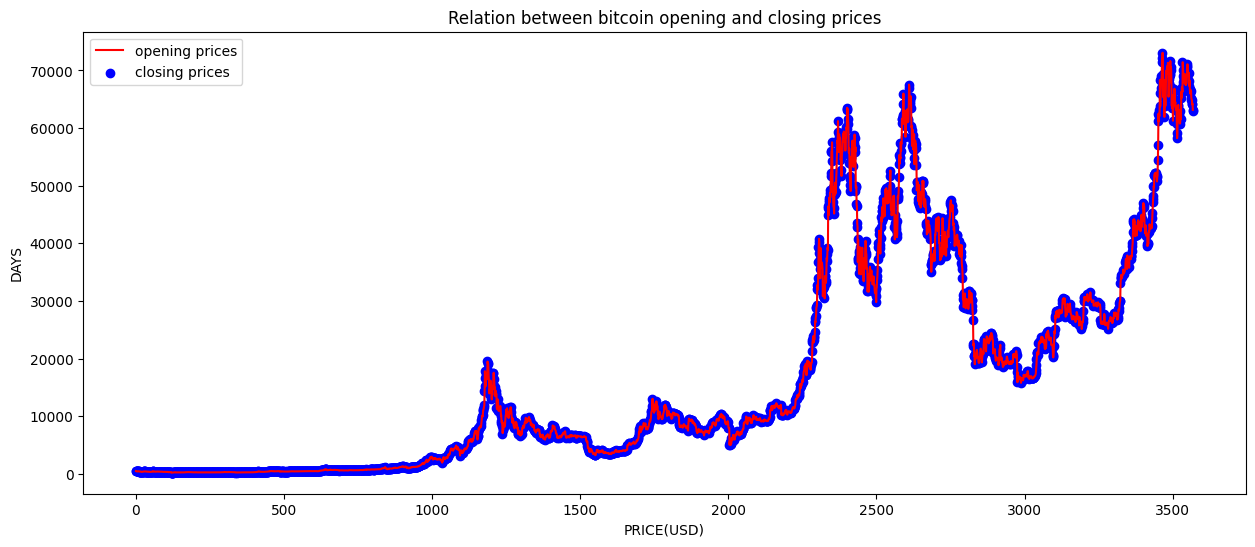

In [ ]:
plt.plot(df['Open'],color='red',label='opening prices')
plt.scatter(df.index,df['Close'],color='blue',label='closing prices')

plt.title('Relation between bitcoin opening and closing prices')
plt.xlabel('PRICE(USD)')
plt.ylabel('DAYS')
plt.legend()

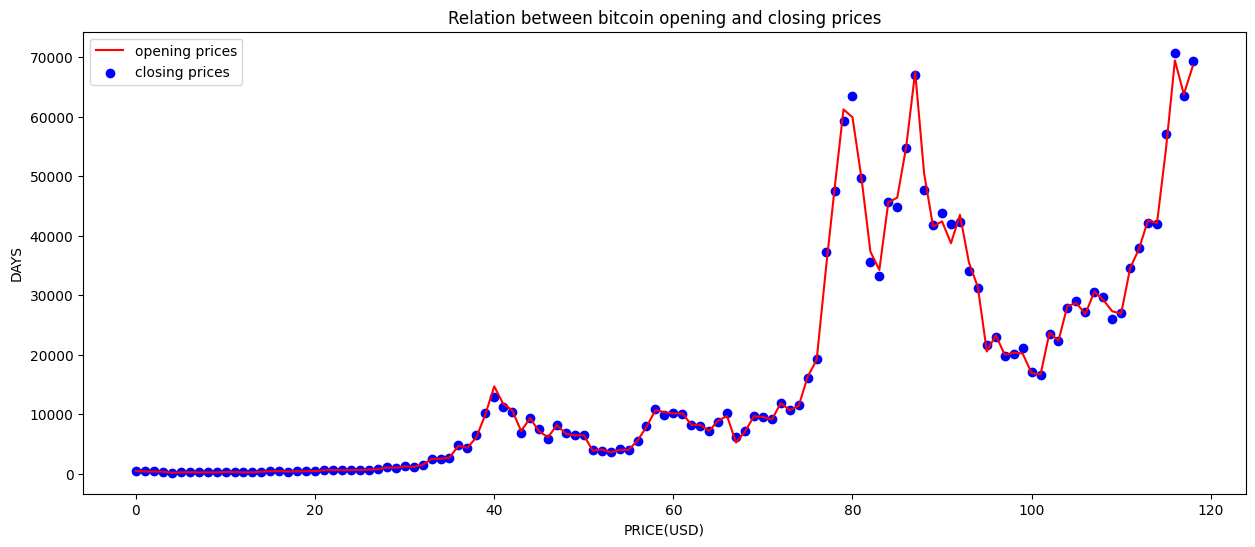

In [ ]:
plt.plot(monthly_df['Open'],color='red',label='opening prices')
plt.scatter(monthly_df.index,monthly_df['Close'],color='blue',label='closing prices')

plt.title('Relation between bitcoin opening and closing prices on a mnothly basis')
plt.xlabel('PRICE(USD)')
plt.ylabel('DAYS')
plt.legend()

- The plots above show that there is very little variation between bitcoin open and close prices.Hence majority of the time odds are the price will remain virtually the same at both the beginning and end of day
- This also further showcases the information provided by the heatmap which a very strong positive correlation between open and close prices 

## PEAK AND MINIMUM DAILY PRICES

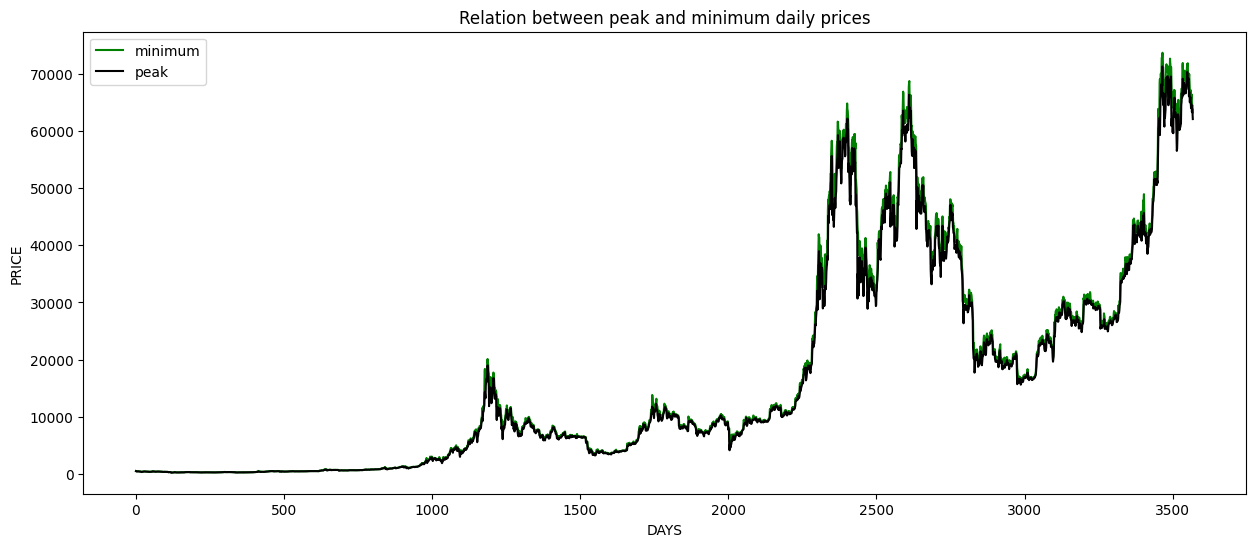

In [36]:
plt.plot(df.index,df['High'],color='green',label='minimum')
plt.plot(df.index,df['Low'],color='black',label='peak')

plt.title('Relation between peak and minimum daily prices')
plt.xlabel('DAYS')
plt.ylabel('PRICE')
plt.legend()

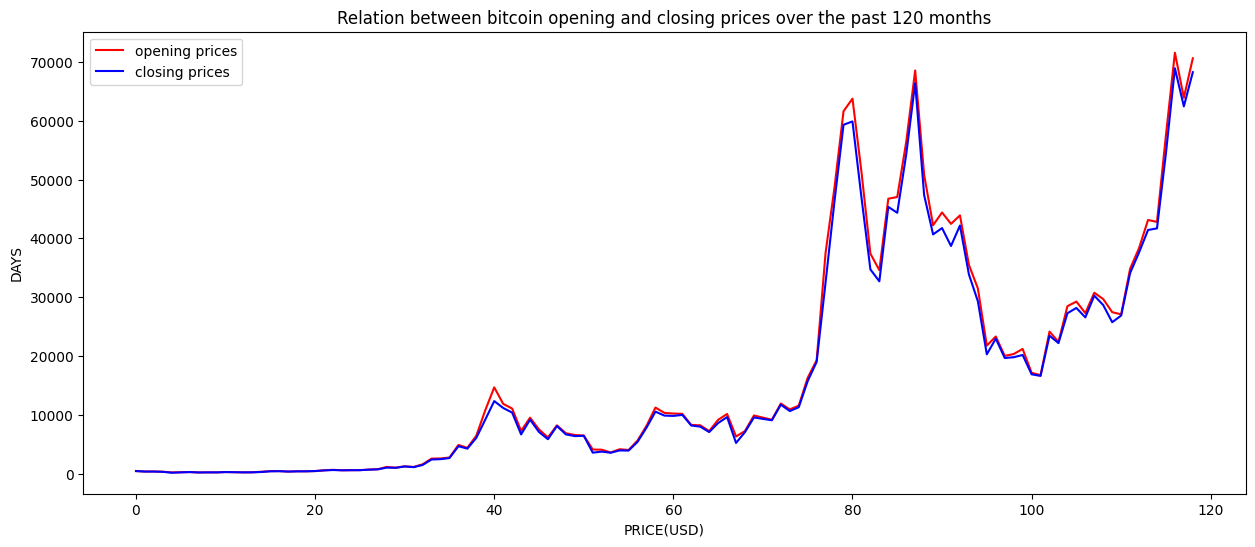

In [30]:
plt.plot(range(monthly_df.shape[0]),monthly_df['High'],color='red',label='opening prices')
plt.plot(range(monthly_df.shape[0]),monthly_df['Low'],color='blue',label='closing prices')

plt.title('Relation between bitcoin opening and closing prices over the past 120 months')
plt.xlabel('PRICE(USD)')
plt.ylabel('DAYS')
plt.legend()

## DOES THE VOLUME REALLY AFFECT THE PRICE OF BITCOIN IN ANY WAY?

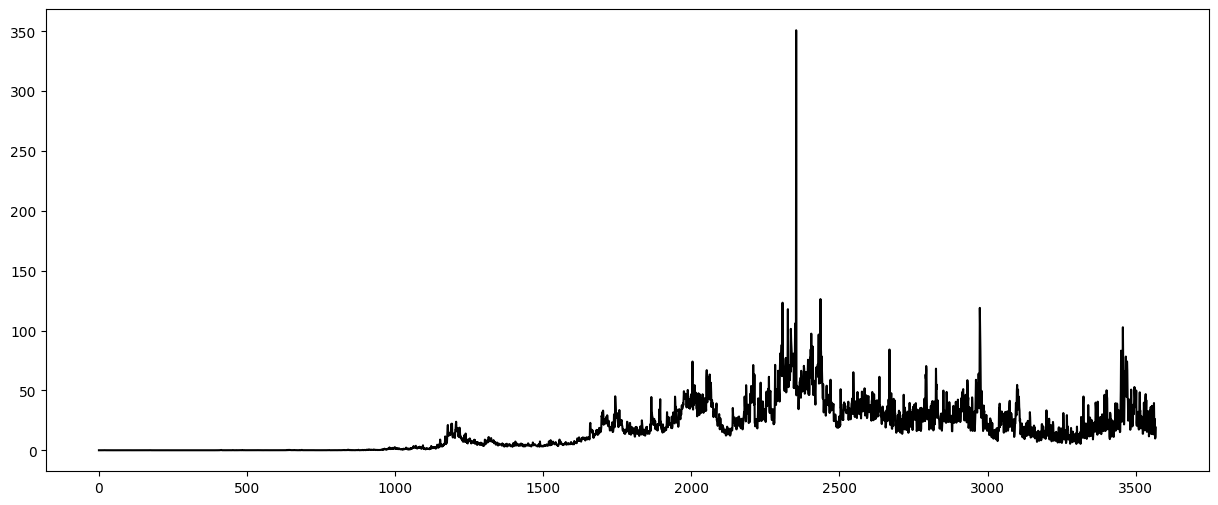

In [46]:
plt.plot(df.index,df['Volume']/1000000000,color='black',label='peak')


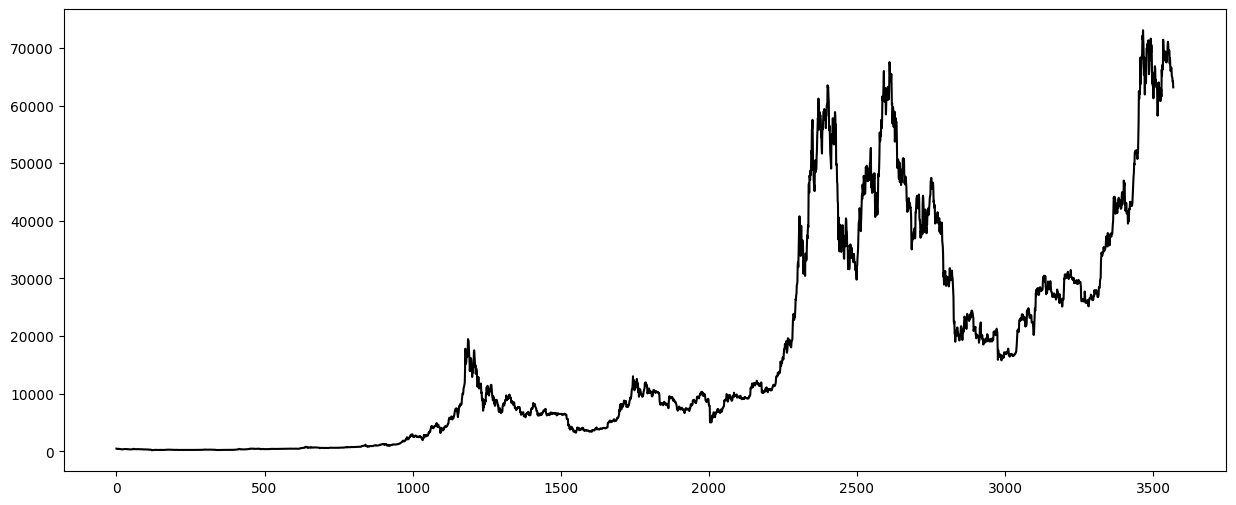

In [48]:
plt.plot(df.index,df['Open'],color='black',label='peak')


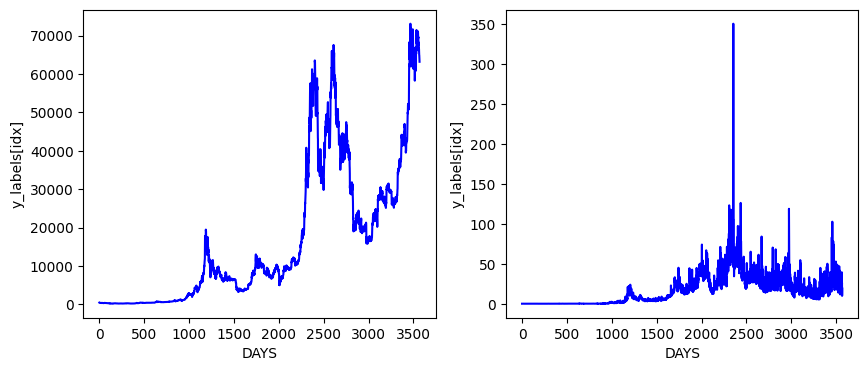

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ys=['Open','Volume']
y_labels=['PRICE(USD)','VOLUME IN BILLIONS']
for idx,plot in enumerate(ax):
    y=df[ys[idx]]
    if idx==1:
        y=df[ys[idx]]/1000000000

    plot.plot(df.index,y,color='blue')
    
    plot.set_xlabel('DAYS')
    plot.set_ylabel('y_labels[idx]')


- Plot above shows, as the heatmap showed, a possible correlation between increase in transactions and bitcoin prices. 
-Transaction volume affects Bitcoin prices by showing how much trading is happening. When many people are buying and selling Bitcoin, prices can be more stable and go up if more people are buying than selling. High volumes with rising prices show confidence, while high volumes with falling prices show doubt. Low volumes can make prices jump around a lot because there aren't many trades to balance big buys or sells. So, how much Bitcoin is being traded helps determine if its price goes up or down smoothly or in big jumps.
- Of course this is not a determining factor though it is quite important